#### Import relevant libraries for the analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Read in the data

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
# FETCH THE FIRST FIVE ROWS IN THE DATA
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
# THE TOTAL NUMBER OF ROWS AND COLUMNS
train.shape

(878049, 9)

#### Getting additional information about the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


###### The data has no missing values. Majority of the columns are of the datatype "Object" of which I would convert to numeric format for the purpose of modelling.

#### The Dates column is converted to datetime format so as to generate additional columns for the analysis

In [ ]:
train['Dates']= pd.to_datetime(train['Dates'])

#### From the Dates column, four additional columns are generated which indicate the Year, Month, Day of the month and Hour of the crime.

In [ ]:
train['Year'] = train.Dates.dt.year
train['Month'] = train.Dates.dt.month
train['Day'] = train.Dates.dt.day
train['Hour'] = train.Dates.dt.hour

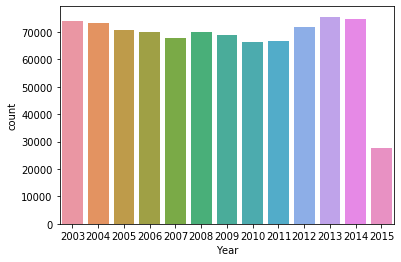

In [ ]:
sns.countplot(train['Year'])

#### From the above plot, we can infer that year 2015 had the least number of crimes committed while 2013 had the highest number of crime

In [ ]:
train['Year'].value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: Year, dtype: int64

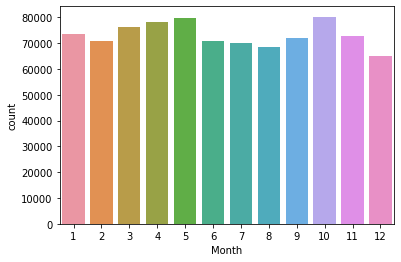

In [ ]:
sns.countplot(train['Month'])

#### From the plot, we can see a decline in the number of crimes committed between the month of June and September. Most of the crimes are committed in October followed by May.

In [ ]:
train.Month.value_counts()

10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: Month, dtype: int64

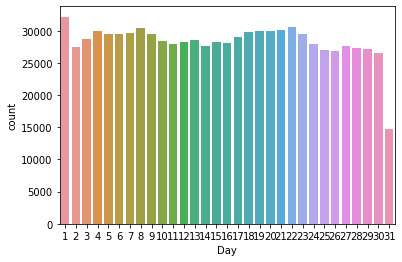

In [ ]:
sns.countplot(train['Day'])

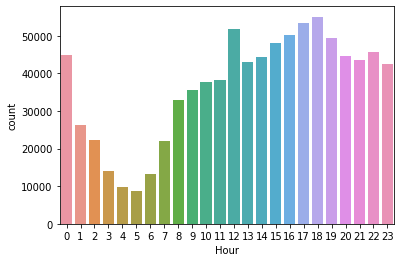

In [ ]:
sns.countplot(train['Hour'])

#### From the above plot, we can infer that less crime are committed at the early hours of the day while more crime are committed towards the evening time.

#### The "Resolution" and "Descript" columns are redundant columns. I would drop them so as to ensure no data leakage when building the machine learning model.

In [ ]:
train.drop(['Resolution','Descript'], 1, inplace = True)

#### Converting the DayOfWeek column to numeric format by mapping each category to an integer.

In [ ]:
train['DayOfWeek'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [ ]:
dow = {'Wednesday':4, 'Tuesday':3, 'Monday':2, 'Sunday':1, 'Saturday':7, 'Friday':6, 'Thursday':5}

In [ ]:
train['DayOfWeek'] = train['DayOfWeek'].map(dow)

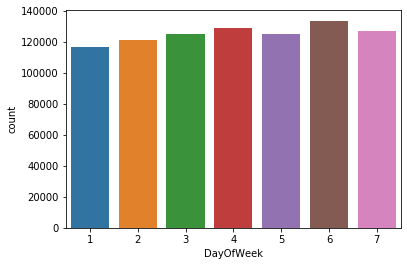

In [ ]:
sns.countplot(train['DayOfWeek'])

#### Explore the PdDistrict column for more information in the data

In [ ]:
dist = {'NORTHERN':1, 'PARK':2, 'INGLESIDE':3, 'BAYVIEW':4, 'RICHMOND':5, 'CENTRAL':6,
       'TARAVAL':7, 'TENDERLOIN':8, 'MISSION':9, 'SOUTHERN':10}

##### I created a copy of the PdDistrict column for my analysis I would drop this new column later. There are ten police districts contained in this data.

In [ ]:
train['PdDist'] = train['PdDistrict'].map(dist)

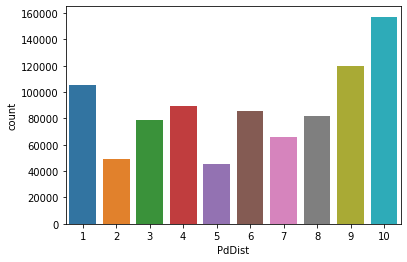

In [ ]:
sns.countplot(train['PdDist'])

#### From the above plot, we can infer that the Southern Police District recorded the largest number of crime followed by the Mission Police District.

In [ ]:
# DROP THE NEW POLICE DISTRICT COLUMN
train.drop('PdDist', 1, inplace = True)

#### For the purpose of modelling, I OneHot Encoded the Police District column using the Pandas Get_Dummies() method and then concatenated it with the Train Dataframe. Meanwhile I dropped the original PdDistrict column since it's no longer needed.

In [ ]:
dummy1 = pd.get_dummies(train['PdDistrict'],prefix = 'PdDist', prefix_sep = '_')

In [ ]:
train = pd.concat([train, dummy1], axis = 1)
train.drop('PdDistrict', 1, inplace = True)

#### Exploring the Address, X and Y columns

In [ ]:
train['Address'].nunique()

23228

In [ ]:
train['X'].nunique()

34243

In [ ]:
train['Y'].nunique()

34243

In [ ]:
train.groupby(['Address', 'X', 'Y'])['Address'].count()

Address                  X            Y        
0 Block of  HARRISON ST  -122.389008  37.789247     1
0 Block of 10TH AV       -122.469055  37.786629     3
                         -122.468917  37.786638     2
0 Block of 10TH ST       -122.417258  37.776270    21
                         -122.417160  37.776347     1
                                                   ..
ZOE ST / BRANNAN ST      -122.395309  37.779297     8
ZOE ST / BRYANT ST       -122.396849  37.780528     1
                                      37.780528     9
ZOE ST / FREELON ST      -122.395839  37.779720     4
ZOE ST / WELSH ST        -122.396308  37.780097     3
Name: Address, Length: 44009, dtype: int64

#### Since the Coordinates (X and Y columns) represent the respective location, the Address column is assumed to be a redundant column. We thereby drop the column together with the Dates column.

In [ ]:
train.drop(['Dates', 'Address'], 1, inplace = True)

#### Explore the Category column which is the TARGET.

In [ ]:
def func(*args):
    lst =[]
    cat = ['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT']
    for dat in args:
        if dat not in cat:
            lst.append('OTHER CRIMES')
        else:
            lst.append(dat)
#     lst = np.asarray(lst)
#     for n in lst:
#         print(n)
    return lst

In [ ]:
tar= train['Category'].apply(func,convert_dtype=False, args=())

In [ ]:
tar2 = tar.astype(str)

In [ ]:
tar2.value_counts()

['OTHER CRIMES']      407787
['LARCENY/THEFT']     174900
['OTHER OFFENSES']    126182
['NON-CRIMINAL']       92304
['ASSAULT']            76876
Name: Category, dtype: int64

In [ ]:
tar2.unique()

array(["['OTHER CRIMES']", "['OTHER OFFENSES']", "['LARCENY/THEFT']",
       "['NON-CRIMINAL']", "['ASSAULT']"], dtype=object)

In [ ]:
var1 = tar2.str.replace("['", "", regex = False)

In [ ]:
var1 = var1.str.replace("']", "", regex = False)

In [ ]:
var1.unique()

array(['OTHER CRIMES', 'OTHER OFFENSES', 'LARCENY/THEFT', 'NON-CRIMINAL',
       'ASSAULT'], dtype=object)

In [ ]:
train['Target'] = var1

In [ ]:
train.drop('Category', 1, inplace = True)

In [ ]:
train.to_csv('trainset.csv',index = False)

#### Separating the features from the target

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])

In [ ]:
train.Target.unique()

array([3, 4, 1, 2, 0])

In [ ]:
data = train.drop('Target', axis = 1)
target = train.Target

In [ ]:
print(data.shape)
print(target.shape)

(878049, 17)
(878049,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from numpy import mean, std
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print('ACCURACY: ', accuracy_score(y_test, pred))

ACCURACY:  0.3897670975456978


In [ ]:
confusion_matrix(y_test, pred)

array([[ 1877,  2756,   932,  8916,   883],
       [ 2457, 11123,  2502, 17407,  1610],
       [ 1476,  4463,  1719,  9847,   995],
       [ 6014, 14634,  4828, 51456,  4689],
       [ 1894,  4165,  1539, 15156,  2272]])

In [ ]:
# svm = SVC()
# svm.fit(X_train, y_train)

In [1]:
# pred2 = svm.predict(X_test)
# print('ACCURACY: ', accuracy_score(y_test, pred2))

In [ ]:
# confusion_matrix(y_test, pred2)

In [2]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [ ]:
# IMPORT THE BOOSTING CLASSIFIER ALGORITHMS
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle = False)

In [ ]:
# # INITIALIZE THE MODEL
cat = CatBoostClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 5000, 
                         eval_metric = 'Accuracy',reg_lambda=50,random_state=42)

In [ ]:
scores = []
for fold,(tr_in,te_in) in enumerate(kf.split(data, target)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    cat.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=50,use_best_model=True)
    y_pred = cat.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

================================Fold0====================================
0:	learn: 0.4757138	test: 0.4757138	test1: 0.2039064	best: 0.2039064 (0)	total: 663ms	remaining: 55m 16s
1:	learn: 0.4762694	test: 0.4762694	test1: 0.2038608	best: 0.2039064 (0)	total: 1.19s	remaining: 49m 40s
2:	learn: 0.4768211	test: 0.4768211	test1: 0.2038722	best: 0.2039064 (0)	total: 1.74s	remaining: 48m 15s
3:	learn: 0.4771286	test: 0.4771286	test1: 0.2038381	best: 0.2039064 (0)	total: 2.29s	remaining: 47m 35s
4:	learn: 0.4768211	test: 0.4768211	test1: 0.2038722	best: 0.2039064 (0)	total: 2.86s	remaining: 47m 37s
5:	learn: 0.4773779	test: 0.4773779	test1: 0.2038153	best: 0.2039064 (0)	total: 3.39s	remaining: 47m 3s
6:	learn: 0.4771779	test: 0.4771779	test1: 0.2038381	best: 0.2039064 (0)	total: 3.95s	remaining: 46m 58s
7:	learn: 0.4769426	test: 0.4769426	test1: 0.2038381	best: 0.2039064 (0)	total: 4.48s	remaining: 46m 34s
8:	learn: 0.4769502	test: 0.4769502	test1: 0.2038608	best: 0.2039064 (0)	total: 5s	rema

In [ ]:
print('ACCURACY: ', mean(scores), (std(scores)))

ACCURACY:  0.42676210570576495 0.08063321681722731


In [ ]:
xgb = XGBClassifier(max_depth= 5, learning_rate=0.05, n_estimators= 5000,n_jobs= -1,random_state= 1)

In [26]:
scores1 = []
for fold,(tr_in,te_in) in enumerate(kf.split(data, target)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    xgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=50)
    y_pred = xgb.predict(X_test)
    scores1.append(accuracy_score(y_test,y_pred))

================================Fold0====================================
[0]	validation_0-merror:0.517374	validation_1-merror:0.79664
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.517422	validation_1-merror:0.796481
[2]	validation_0-merror:0.517919	validation_1-merror:0.796413
[3]	validation_0-merror:0.515867	validation_1-merror:0.796515
[4]	validation_0-merror:0.51756	validation_1-merror:0.796492
[5]	validation_0-merror:0.517722	validation_1-merror:0.796435
[6]	validation_0-merror:0.516776	validation_1-merror:0.796481
[7]	validation_0-merror:0.516988	validation_1-merror:0.796526
[8]	validation_0-merror:0.516996	validation_1-merror:0.796458
[9]	validation_0-merror:0.516732	validation_1-merror:0.796538
[10]	validation_0-merror:0.516747	validation_1-merror:0.796526
[11]	validation_0-merror:0.516856	validation_1-merror:0.796526
[12]	validation_0-m

In [27]:
print('ACCURACY: ', mean(scores1), (std(scores1)))

ACCURACY:  0.2996793707960744 0.16179724217914315


In [28]:
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
                                learning_rate=0.05, n_estimators=100, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)

In [29]:
scores2 = []
for fold,(tr_in,te_in) in enumerate(kf.split(data, target)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    lgbm.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=50)
    y_pred = lgbm.predict(X_test)
    scores2.append(accuracy_score(y_test,y_pred))

================================Fold0====================================
[1]	training's multi_logloss: 1.40271	valid_1's multi_logloss: 1.40715
Training until validation scores don't improve for 50 rounds.
[2]	training's multi_logloss: 1.39965	valid_1's multi_logloss: 1.41065
[3]	training's multi_logloss: 1.3967	valid_1's multi_logloss: 1.41506
[4]	training's multi_logloss: 1.39378	valid_1's multi_logloss: 1.42257
[5]	training's multi_logloss: 1.39127	valid_1's multi_logloss: 1.42823
[6]	training's multi_logloss: 1.38863	valid_1's multi_logloss: 1.4363
[7]	training's multi_logloss: 1.38621	valid_1's multi_logloss: 1.44748
[8]	training's multi_logloss: 1.38389	valid_1's multi_logloss: 1.45979
[9]	training's multi_logloss: 1.38171	valid_1's multi_logloss: 1.46522
[10]	training's multi_logloss: 1.37966	valid_1's multi_logloss: 1.47899
[11]	training's multi_logloss: 1.37791	valid_1's multi_logloss: 1.48767
[12]	training's multi_logloss: 1.37607	valid_1's multi_logloss: 1.50285
[13]	traini

In [30]:
print('ACCURACY: ', mean(scores2), (std(scores2)))

ACCURACY:  0.4644239672236835 4.617663377498001e-06
